In [20]:
import os
import numpy as np
from PIL import Image
from matplotlib.colors import rgb_to_hsv

In [11]:
def square(image):
    """Takes an image and resizes the canvas to a smallest square containing the
       original image. The old image is centered on the new canvas. Returns a new
       image.
    """
    old_width, old_height = image.size
    
    # Take the larger side as the new side length
    new_size = max(image.size)

    # Center the image
    x = int(np.floor((new_size - old_width) / 2))
    y = int(np.floor((new_size - old_height) / 2))

    # New background is transparent black
    new_background = (0, 0, 0, 0)
    
    # Create a new image with square dimensions and paste the old image in the center.
    new_image = Image.new(image.mode, (new_size, new_size), new_background)
    new_image.paste(image, (x, y, x + old_width, y + old_height))
    return new_image


In [24]:
input_directory = './textures/'
output_directory = './128x128/'

# Make output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.mkdir(output_directory)
    
# Get all PNG files
for root, dirs, files in os.walk(input_directory):
    png_files = sorted([x for x in files if '.png' in x])

# Square the images, resize them to 128x128, convert ot HSV and save in the 
# output directory
for png_file in png_files:
    print(png_file)
    image = Image.open(os.path.join(input_directory, png_file))
    new_image = np.array(square(image).resize((128, 128), Image.LANCZOS))
    new_image[:,:,:3] = (rgb_to_hsv(new_image[:,:,:3].astype(np.float32)/255.0)*255.0).astype(np.uint8)
    new_image = Image.fromarray(new_image)
    new_image.save(os.path.join(output_directory, png_file))

background.png
halo1.png
halo2.png
meduusa1.png
meduusa2.png
meduusa3.png
molli1.png
molli2.png
molli3.png
plurt1.png
plurt2.png


In [15]:
from matplotlib.colors import rgb_to_hsv

uint8


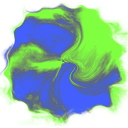

In [19]:
new_image = square(Image.open('./textures/molli1.png')).resize((128,128), Image.LANCZOS)
rgba = np.array(new_image)
rgba[:,:,:3] = (rgb_to_hsv(rgba[:,:,:3].astype(np.float32)/255.0)*255.0).astype(np.uint8)
new_image = Image.fromarray(rgba)
print(rgba.dtype)
new_image

In [17]:
rgb_to_hsv?